<a href="https://colab.research.google.com/github/ehsung/PUBH6886/blob/main/PUBH6886_Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PUBH 6886 Homework 1
## Completed by Edward Sung
## Completed on 9/17/24

### Completed homwework using python google colab

- [Section 1: Introduction](#section-1-introduction)

### Table of Contents
* [1. Packages](#Packages)
* [2. Load in Data](#Train_Data)
* [3. Load Models and Scoring Metrics](#Load_Models)
  * [3a. Predict Comparisons](#Predict_Comparisons)
  * [3b. Accuracy Comparisons](#Accuracy_Comparisons)
  * [3c. F1_Macro Score Comparisons](#F1_Comparisons)
  * [3d. Confusion Matrix Comparisons](#Confusion_Comparisons)
* [4. Kaggle Output Data and Final Model Testing](#Kaggle)
* [5. Follow Up](#Follow_Up)
  * [5a. Feature Importance](#Feature_Importance)
  * [5b. Sufficient Training Size](#Training_Size)
  * [5c. Missing Data](#Missing_Data)
  * [5d. Class Imbalance](#Class_Imbalance)
* [6 Future Follow-Up Projects](#Follow-Up_Projects)

# Section 1: Introduction

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
# Load in data
datafile = "/content/bdiag.csv"
rawData = pd.read_csv(datafile)

rawData.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
# See data types
rawData.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [17]:
# Drop id, since this is not a feature data
# Drop diagnosis, since this isnt part of the mean, se, worst measurements
unscaled_data = rawData.drop(columns=['id', 'diagnosis'])
unscaled_data.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

 # Part 1___a

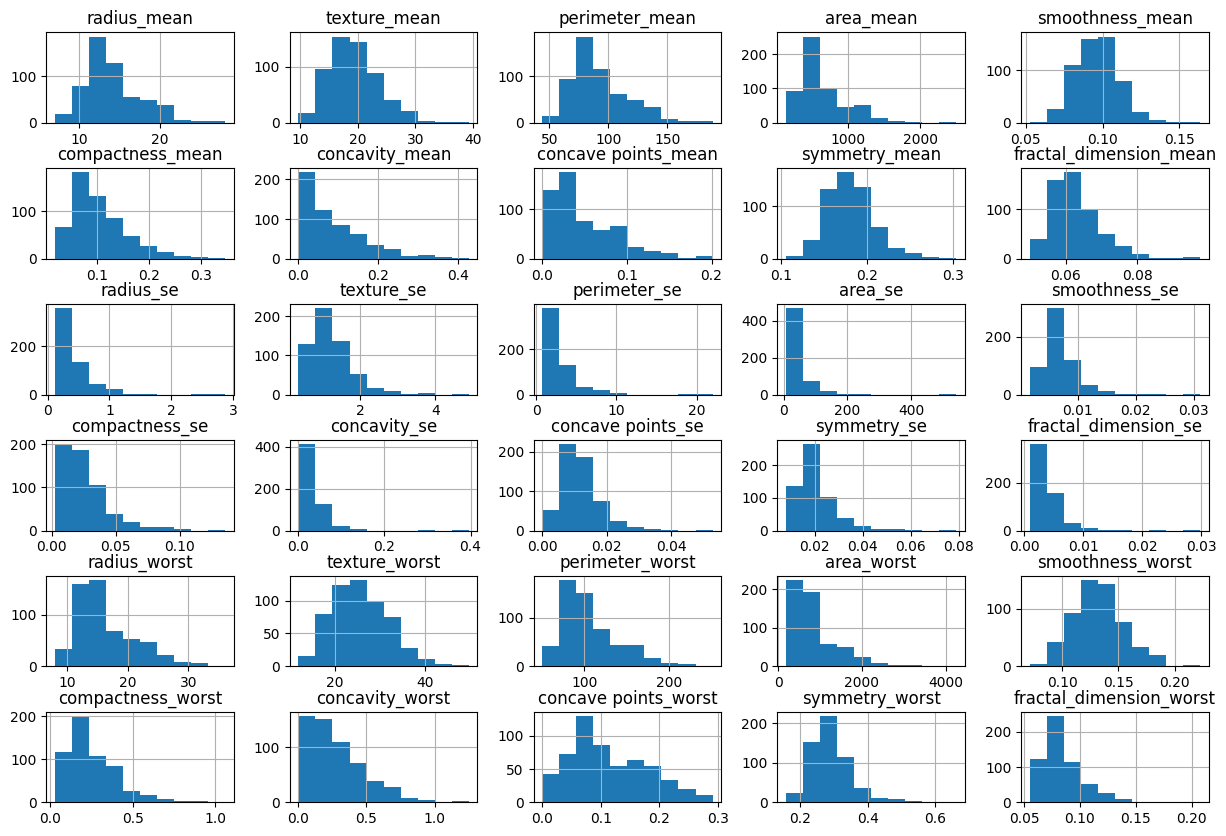

In [33]:
# Quick histogram of the measurements on the unscaled data
numData = unscaled_data.select_dtypes('float64')

numData.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);
plt.show()

In [37]:
# Perform PCA on the unscaled Data
unscaled_data_PCA = PCA()

unscaled_data_PCA.fit(unscaled_data)

PCA()

In [38]:
# Plot the PCA components variance explained
%%capture
fig , axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(unscaled_data_PCA.n_components_)+1
ax = axes[0]
ax.plot(ticks,
        unscaled_data_PCA.explained_variance_ratio_ ,
        marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)

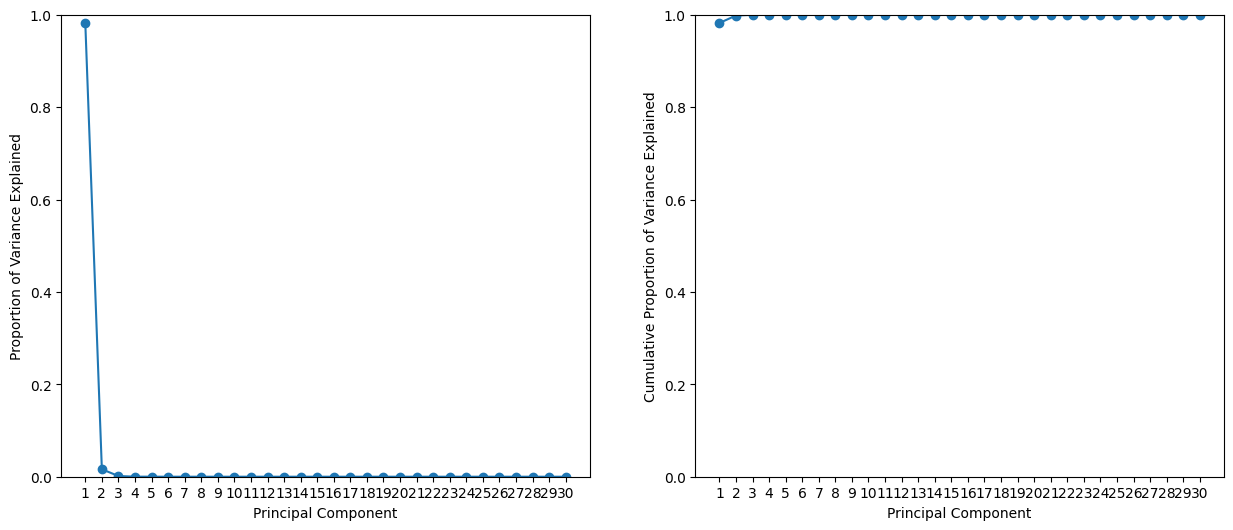

In [39]:
ax = axes[1]
ax.plot(ticks,
        unscaled_data_PCA.explained_variance_ratio_.cumsum(),
        marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig

In [43]:
# Numerical cumsum of the variance explained, starting with PC_1, PC_2, up to PC_5
unscaled_data_PCA.explained_variance_ratio_.cumsum()[:5]

array([0.98204467, 0.99822116, 0.99977867, 0.9998996 , 0.99998788])

If we want the smallest number of PCA retained for at least 75% of the variance in the data, we would use the first PCA. In fact, PC_1 actually explains 98% of the variance as seen in the second plot (right plot) and numerically in my cumsum array.

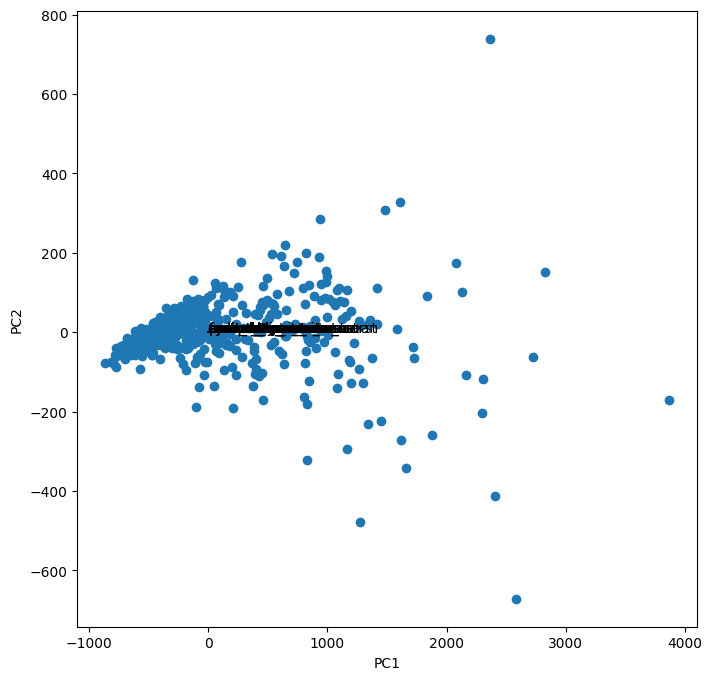

In [31]:
# Biplot of PC1 vs PC2
scores = unscaled_data_PCA.transform(unscaled_data)

i, j = 0, 1 # which components (PC1 and PC2)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:, 0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(unscaled_data_PCA.components_.shape[1]):
  ax.arrow(0, 0, unscaled_data_PCA.components_[i, k], unscaled_data_PCA.components_[j, k])
  ax.text(unscaled_data_PCA.components_[i, k],
          unscaled_data_PCA.components_[j, k],
          unscaled_data.columns[k])

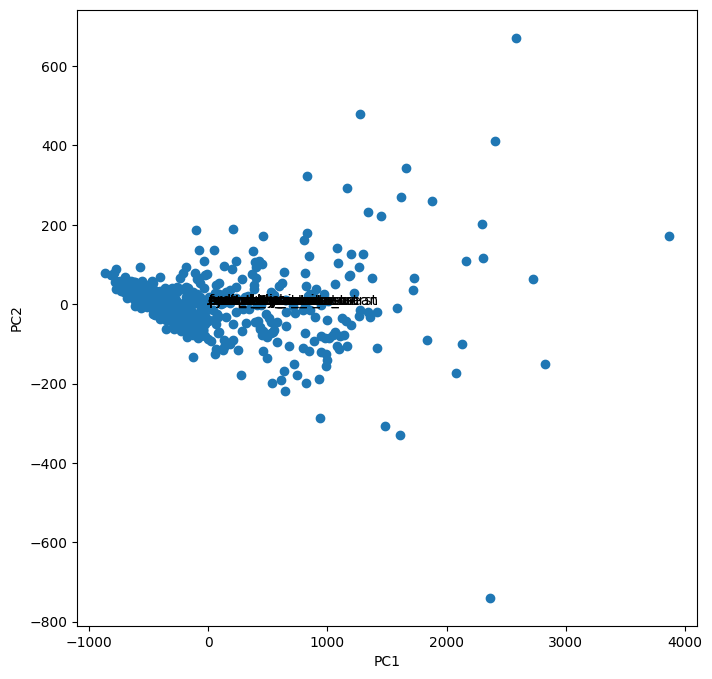

In [32]:
# Flip and plot
scale_arrow = s_ = 2
scores[:,1] *= -1
unscaled_data_PCA.components_[1] *= -1 # flip the y-axis
fig , ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(unscaled_data_PCA.components_.shape[1]):
  ax.arrow(0, 0, s_*unscaled_data_PCA.components_[i,k], s_*unscaled_data_PCA.components_[j,k])
  ax.text(s_*unscaled_data_PCA.components_[i,k],
          s_*unscaled_data_PCA.components_[j,k],
          unscaled_data.columns[k])

By plotting PCA scores of the first and second components, we can see that PC1 holds essentially all of the variance in the data as you can see a flat horiztonal line for all 30 features. This is also visible in just the difference in scale between PC1 vs PC2, where PC2 goes up to ~700, while PC1 scales up to 4000.

# Part1___b